In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# 모델 생성 (overfitting 방지)
tree = DecisionTreeClassifier(
    criterion='gini',         # 또는 'entropy'
    max_depth=3,              # 최대 깊이
    min_samples_split=5,      # 분할 최소 샘플
    min_samples_leaf=2,       # 리프 최소 샘플
    random_state=42
)


In [5]:
# 학습
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
# 평가
train_acc = tree.score(X_train, y_train)
test_acc = tree.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.950
Test Accuracy: 1.000


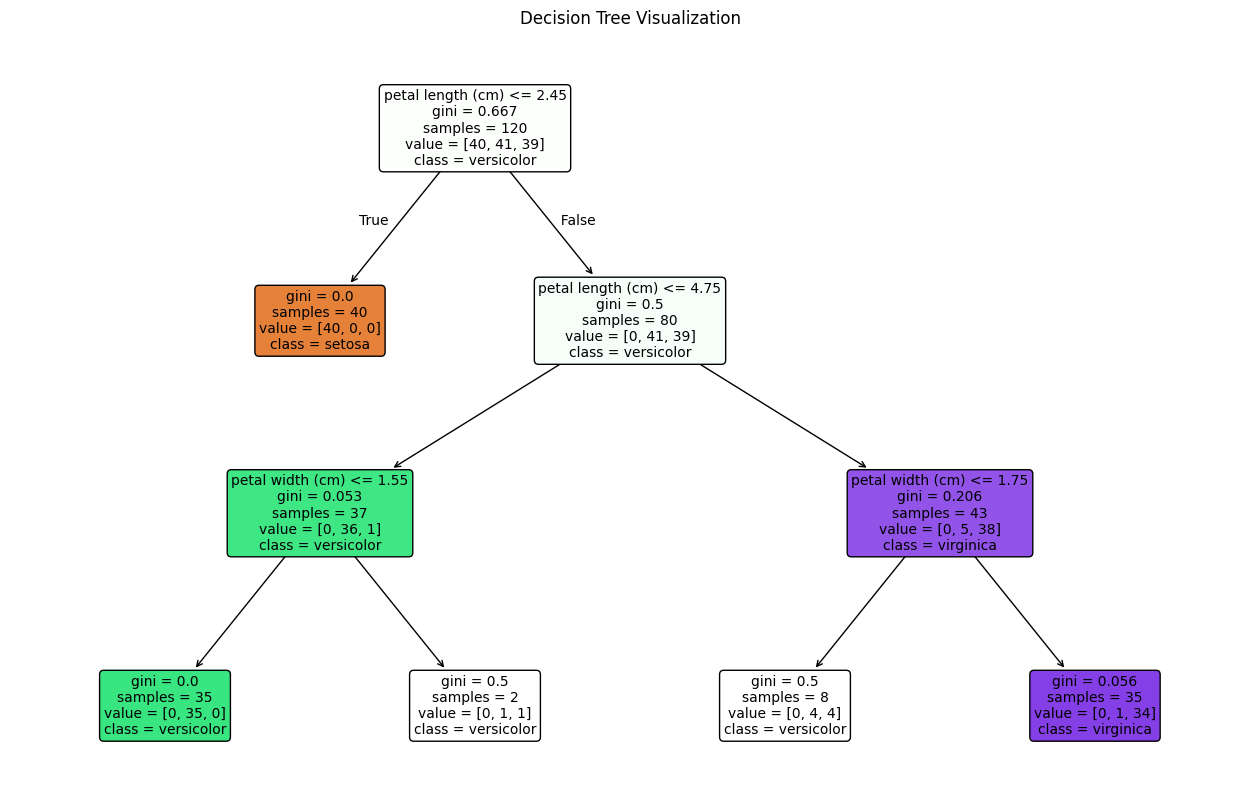

In [7]:
# 트리 시각호
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(tree, 
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,           # 색상 채우기
        rounded=True,          # 모서리 둥글게
        fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.947
petal width (cm): 0.053


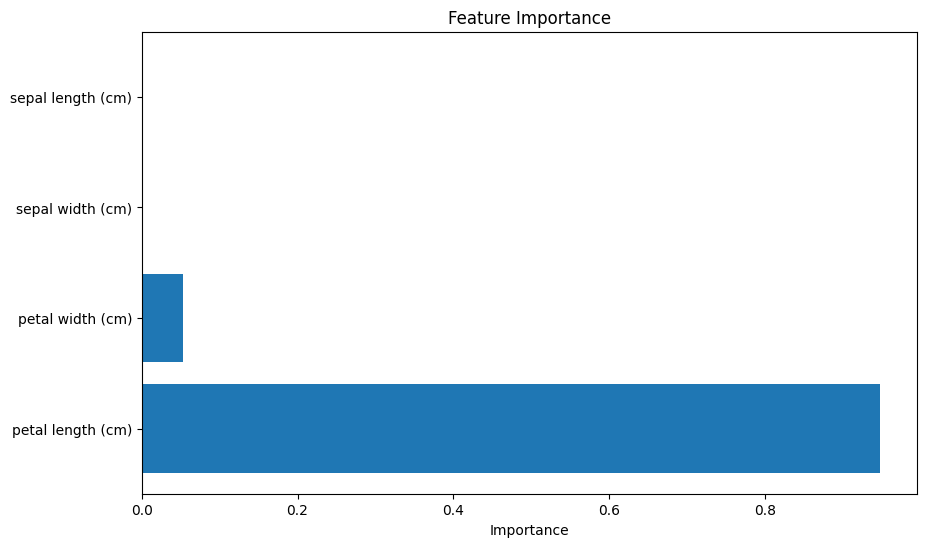

In [8]:
# 특성 중요도 확인
importances = tree.feature_importances_

for name, importance in zip(iris.feature_names, importances):
    print(f"{name}: {importance:.3f}")

# 시각화
import pandas as pd

importance_df = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

| 알고리즘                                   | 주요 특징                | 잘 맞는 상황                                                       | 주의할 점                                |
| -------------------------------------- | -------------------- | ------------------------------------------------------------- | ------------------------------------ |
| **Decision Tree (의사결정 트리)**            | 규칙 기반, 해석 쉬움, 비선형 가능 | - 데이터가 “규칙적으로” 나뉘는 경우<br>- 모델 설명이 필요한 경우<br>예: 고객 이탈 예측, 신용평가 | 과적합 위험 → `max_depth` 등 하이퍼파라미터 조정 필요 |
| **Random Forest / XGBoost**            | 트리 여러 개의 앙상블 (성능↑)   | - 특징이 많거나, 트리형 데이터 구조가 유효할 때<br>- 예측 정확도가 중요할 때               | 계산량 많음, 해석 어려움                       |
| **Logistic Regression**                | 선형 모델, 확률 출력         | - 특징과 결과 사이 관계가 “선형적”일 때<br>- 예측 확률이 필요한 문제                   | 선형 가정이 안 맞으면 성능 하락                   |
| **Naive Bayes**                        | 확률 기반, 빠르고 단순        | - 텍스트 데이터 (단어 등장 확률)<br>- 작은 데이터셋                             | 특징 간 독립 가정이 비현실적일 수 있음               |
| **LDA (Linear Discriminant Analysis)** | 클래스 간 분산 최대화         | - 라벨 간 구분이 명확할 때<br>- 차원 축소 + 분류 함께 하고 싶을 때                   | 정규분포 가정, 선형 구분 불가 데이터엔 부적합           |
| **KNN (K-Nearest Neighbors)**          | 주변 이웃으로 분류, 비선형 가능   | - 데이터 구조가 단순하고, 샘플 수가 많지 않을 때<br>- “비슷한 것끼리” 묶는 문제            | 거리 계산량 ↑, 차원 커지면 성능↓                 |
| **SVM (Support Vector Machine)**       | 마진 최대화, 경계 잘 찾음      | - 경계선이 명확하고 데이터가 복잡할 때                                        | 대규모 데이터엔 느림                          |
| **Neural Network**                     | 비선형 학습, 복잡한 패턴 탐지    | - 이미지, 음성, 텍스트 등 복잡한 패턴                                       | 학습 느림, 많은 데이터 필요                     |
